The following script is made to design a Neural Network from scratch (without any libraries)

necessary imports...

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


*P1.1*

1.
2.
3.




1. Softmax-Regression loss and gradients calculation

    Parameters:
    - X: Input data matrix of shape (num_features, num_samples)
    - Y: True labels matrix of shape (num_classes, num_samples)
    - W: Weight matrix of shape (num_features, num_classes)
    - b: Bias vector of shape (num_classes,)

    Returns:
    - loss: Scalar value representing the loss
    - dw: Gradient of the loss with respect to W
    - db: Gradient of the loss with respect to b
    - dx: Gradient of the loss with respect to X


In [6]:
def softmax_regression_loss(X, Y, W, b):

    num_samples = X.shape[1]

    #calculate the value of the linear multiplication with normalization:
    linear_calc = np.dot(X.T, W) + b.reshape(1,-1)
    max_col = np.max(linear_calc, axis=1).reshape(-1,1)
    linear_norm = linear_calc - max_col
    #compute the softmax function:
    linear_norm_exp = np.exp(linear_norm)
    softmax = linear_norm_exp / np.sum(linear_norm_exp, axis=1).reshape(-1,1)

    #compute loss:
    log_softmax = np.log(softmax)
    #replace loss_unnorm with a vector with each entry being the inner multiplication of each column of Y with the corresponding column of log_softmax:
    loss_unnorm = Y*log_softmax.T
    loss = -np.sum(np.sum(loss_unnorm, axis=0)) / num_samples

    #compute gradients:
    dsoftmax = softmax - Y.T
    dw = np.dot(X, dsoftmax) / num_samples
    db = np.sum(dsoftmax, axis=0) / num_samples

    #gradient w.t.r to X:
    dx = np.dot(W, softmax.T - Y) / num_samples


    return loss, dw, db, dx


2. Jacobian (or Gradient) Verification.
**let gpt implement**
    

In [7]:
def jacobian_verification(X,W,Y,b, epsilons, loss_function):
    
    num_features = X.shape[0]
    num_samples = X.shape[1]
    d = np.random.rand(num_features, num_samples)

    losses_ord1 = []
    losses_ord2 = []
        
    for epsilon in epsilons:
        eps_d = epsilon*d
        X_plus = X.copy() + eps_d

        #first order:
        loss_plus, _, _, _ = loss_function(X_plus, Y, W, b)
        loss, _,_, dx = loss_function(X, Y, W, b)
        loss_ord1 = loss_plus - loss
        loss_ord1_abs = np.abs(loss_ord1)
        #second order:
        loss_ord2 = loss_ord1 - np.sum(np.multiply(eps_d, dx))
        loss_ord2_abs = np.abs(loss_ord2)

        losses_ord1.append(loss_ord1_abs)
        losses_ord2.append(loss_ord2_abs)
    
    return losses_ord1, losses_ord2
     


In [8]:
def jacobian_verification_visualizer(losses_ord1, losses_ord2, epsilons):
    epsilons = np.sort(epsilons)
    plt.plot(epsilons, losses_ord1, label='First Order - O(\u03B5)')
    plt.plot(epsilons, losses_ord2, label='Second Order - O(\u03B5^2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Epsilon')
    plt.ylabel('Loss')
    plt.title('Gradient Verification - Log Scale')
    plt.legend()
    plt.show()

3. Randomise input and show correctness of p1 w.r.t p2

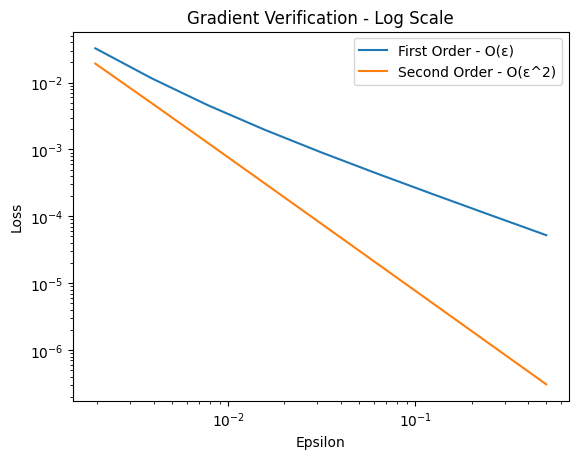

In [9]:
# Generate random X, Y, W, b, epsilons, d matching the dimensions in the above function signature:
num_features = 5
num_classes = 3
num_samples = 10
X = np.random.rand(num_features, num_samples)
W = np.random.rand(num_features, num_classes)
b = np.random.rand(num_classes,1)
#set Y to a random matrix with 1s in the correct class and 0s elsewhere:
Y = np.zeros((num_classes, num_samples))
for i in range(num_samples):
    Y[np.random.randint(0, num_classes), i] = 1
# create a decending array of epsilon values:
epsilons = np.array([(0.5)**i for i in range(1, 10)])
loss_function = softmax_regression_loss

losses_ord1, losses_ord2 = jacobian_verification(X , W, Y, b, epsilons, loss_function)
jacobian_verification_visualizer(losses_ord1, losses_ord2, epsilons)



*P1.2*:
1. SGD
2.
.
.
.


1. Implement SGD
- let gpt complete Input/Out desc

In [10]:
def sgd(X, W, Y, b, loss_function,  alpha = 0.1, num_iterations = 10000):

    losses = []
    for i in range(num_iterations):
        loss, dw, db, _ = loss_function(X, Y, W, b)
        print (f"SGD iteration: {i}. Loss = {loss}")
        losses.append(loss)
        W -= alpha*dw
        b -= alpha*db
    return W, b, losses

2. Create a 1D least-squares example to test SGD implementation:
- GPT...

In [11]:
def least_squares_loss(X, Y, W, b):
    num_samples = X.shape[1]

    # Compute the predicted values
    Y_pred = np.dot(X.T, W) + b

    # Compute the loss
    loss = np.sum((Y_pred - Y)**2) / (2 * num_samples)

    # Compute the gradients
    dW = np.dot(X, (Y_pred - Y).T) / num_samples
    db = np.sum(Y_pred - Y) / num_samples
    dX = np.dot(W.T, (Y_pred - Y)) / num_samples

    return loss, dX, dW, db

In [12]:
# #create a data set that matches y=2x
# X,Y = np.arange(1,100).reshape(1,-1), 2*np.arange(1,100).reshape(1,-1)
# #init w,b to match a different line - y=-x+1
# w,b = np.array([-1]*99).reshape(-1,1),np.array(1).reshape(-1,1)

# sgd_W, sgd_b, sgd_losses = sgd(X, w, Y, b, least_squares_loss)

# '''
# plot:
# 1. the learned linear function for the data-set VS the initialised function on top the Data
# 2. the learning curve
# '''
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the data and initial linear function
# ax1.scatter(X, Y, label='Data')
# ax1.plot(X, np.dot(w, X) + b, label='Initial')
# ax2.plot(X, np.dot(sgd_W, X) + sgd_b, label='After SGD')
# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_title('Linear Functions vs Data')
# ax1.legend()

# # Plot the linear function after SGD and the losses

# ax2.plot(sgd_losses, label='SGD Losses')
# ax2.set_xlabel('Iteration')
# ax2.set_ylabel('Loss')
# ax2.set_title('SGD Losses')
# ax2.legend()

# plt.show()




